In [1]:
from glob import glob
import os

import pandas as pd
import numpy as np

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./dataset/CUSTOM/공주.csv")

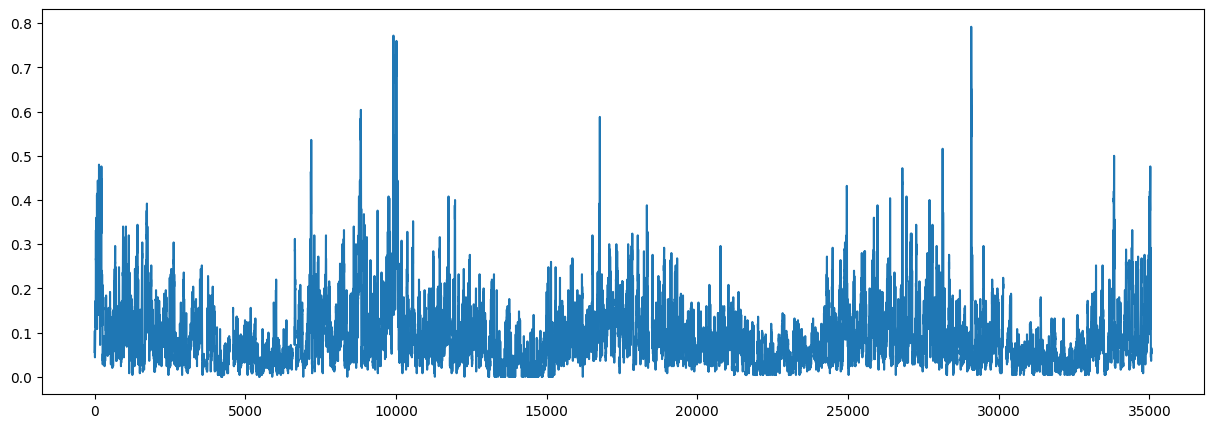

In [7]:
df["PM2.5"].plot(figsize=(15, 5))
# df["강수량(mm)"].plot(figsize=(15, 5))
# df["기온(°C)"].plot(figsize=(15, 5))
# df["습도(%)"].plot(figsize=(15, 5))
# df["풍속(m/s)"].plot(figsize=(15, 5))
# df["풍향(deg)"].plot(figsize=(15, 5))

plt.show()

In [8]:
train_df = df.iloc[:int(len(df)*0.8)].copy()
test_df = df.iloc[int(len(df)*0.8):].copy()

In [11]:
def create_feature(df):
  X = df[["강수량(mm)", "기온(°C)", "습도(%)", "풍속(m/s)", "풍향(deg)"]]
  y = df["PM2.5"]
  return X, y

In [12]:
X_train, y_train = create_feature(train_df)
X_test, y_test = create_feature(train_df)

In [13]:
reg = xgb.XGBRegressor(
  n_extimators=1000
)

reg.fit(
  X_train,
  y_train,
  eval_set=[(X_train, y_train), (X_test, y_test)],
  early_stopping_rounds=50,
  verbose=False
)

XGBoostError: [02:00:12] ../src/data/data.cc:461: Check failed: valid: Label contains NaN, infinity or a value too large.
Stack trace:
  [bt] (0) /home/bsh/.local/share/virtualenvs/aifactory-Bi1Q9pbK/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x20b233) [0x7fc2e7642233]
  [bt] (1) /home/bsh/.local/share/virtualenvs/aifactory-Bi1Q9pbK/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x218175) [0x7fc2e764f175]
  [bt] (2) /home/bsh/.local/share/virtualenvs/aifactory-Bi1Q9pbK/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(+0x2196b0) [0x7fc2e76506b0]
  [bt] (3) /home/bsh/.local/share/virtualenvs/aifactory-Bi1Q9pbK/lib/python3.9/site-packages/xgboost/lib/libxgboost.so(XGDMatrixSetInfoFromInterface+0xad) [0x7fc2e7571f3d]
  [bt] (4) /lib/x86_64-linux-gnu/libffi.so.7(+0x6ff5) [0x7fc376c03ff5]
  [bt] (5) /lib/x86_64-linux-gnu/libffi.so.7(+0x640a) [0x7fc376c0340a]
  [bt] (6) /home/bsh/.pyenv/versions/3.9.16/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0x12bd1) [0x7fc376eacbd1]
  [bt] (7) /home/bsh/.pyenv/versions/3.9.16/lib/python3.9/lib-dynload/_ctypes.cpython-39-x86_64-linux-gnu.so(+0xb8b1) [0x7fc376ea58b1]
  [bt] (8) /home/bsh/.pyenv/versions/3.9.16/lib/libpython3.9.so.1.0(_PyObject_MakeTpCall+0x8c) [0x7fc3777525bc]

